HEART DISEASE PREDICTION - CAPSTONE PROJECT
Student: Tricia Nshuti 
Course: INSY 8413 - Introduction to Big Data Analytics
Dataset: UCI Heart Disease Dataset
✅ Dataset loaded successfully!
📊 Dataset shape: (303, 14)

INITIAL DATA OVERVIEW

📋 BASIC DATASET INFORMATION:
   • Shape: (303, 14)
   • Memory usage: 33.27 KB

🔍 DATA TYPES:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

👀 FIRST 5 ROWS:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.

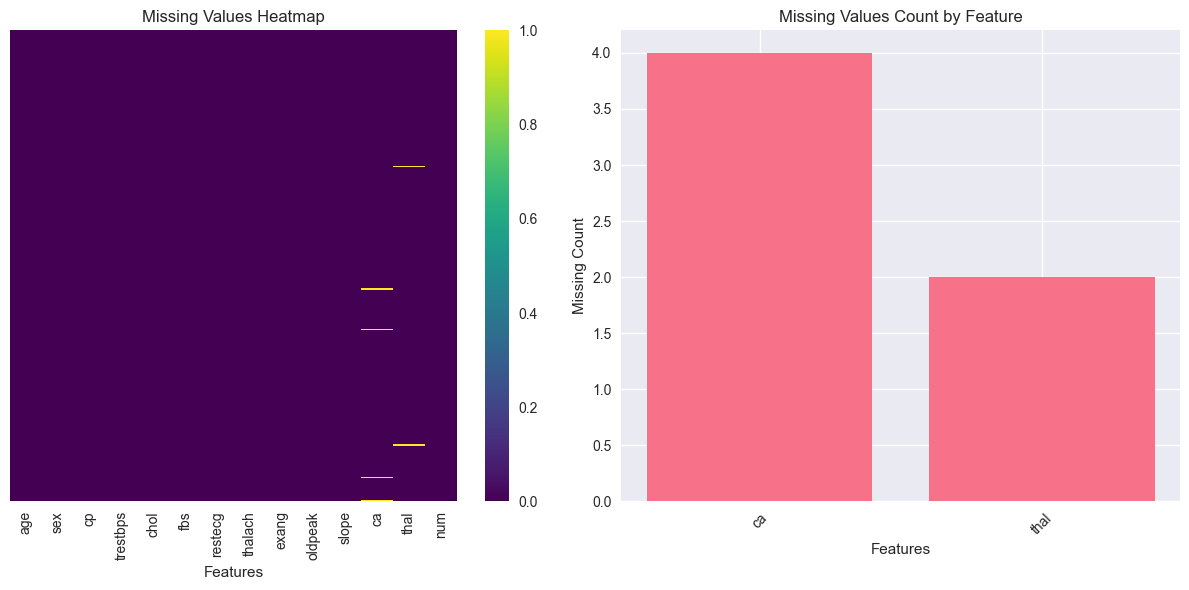


TARGET VARIABLE ANALYSIS

🎯 TARGET VARIABLE DISTRIBUTION:
Value Counts:
   • Class 0: 164 patients (54.1%)
   • Class 1: 55 patients (18.2%)
   • Class 2: 36 patients (11.9%)
   • Class 3: 35 patients (11.6%)
   • Class 4: 13 patients (4.3%)

🎯 BINARY TARGET DISTRIBUTION:
   • No Heart Disease (0): 164 patients (54.1%)
   • Heart Disease (1): 139 patients (45.9%)


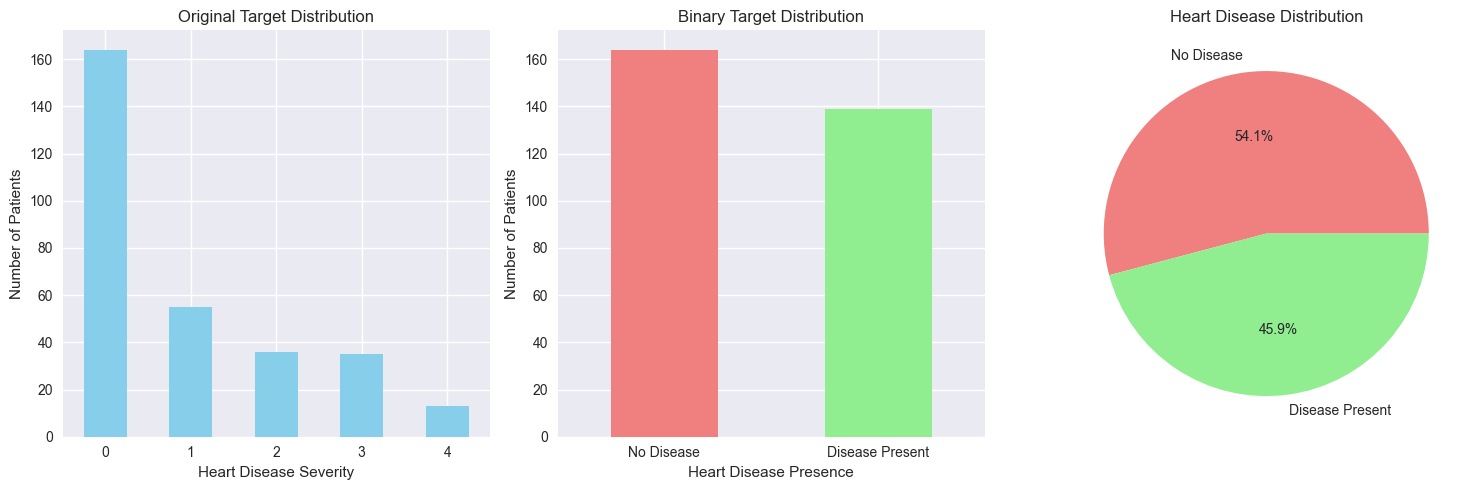


SAVING INITIAL RESULTS

📋 DATASET SUMMARY STATISTICS:
   • Total Patients: 303
   • Total Features: 15
   • Missing Values: 6
   • Heart Disease Cases: 139
   • Healthy Cases: 164
   • Dataset Quality: Good

💾 Data saved as 'heart_disease_initial.csv'
✅ Initial exploration completed successfully!

NEXT STEPS:
1. ✅ Data acquisition and initial exploration completed
2. 🔄 Ready for data preprocessing and cleaning
3. 📊 Ready for exploratory data analysis (EDA)
4. 🤖 Ready for machine learning modeling


In [1]:
# Heart Disease Prediction - Data Acquisition & Initial Exploration
# Capstone Project: Introduction to Big Data Analytics

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for professional appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("HEART DISEASE PREDICTION - CAPSTONE PROJECT")
print("=" * 60)
print("Student: Tricia Nshuti ")
print("Course: INSY 8413 - Introduction to Big Data Analytics")
print("Dataset: UCI Heart Disease Dataset")
print("=" * 60)

# ==============================================================================
# STEP 1: DATA ACQUISITION
# ==============================================================================

def load_heart_disease_data():
    """
    Load the UCI Heart Disease dataset
    """
    try:
        # UCI Heart Disease dataset URL
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        
        # Define column names based on the dataset documentation
        column_names = [
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
            'ca', 'thal', 'num'
        ]
        
        # Load the dataset
        df = pd.read_csv(url, names=column_names, na_values='?')
        
        print("✅ Dataset loaded successfully!")
        print(f"📊 Dataset shape: {df.shape}")
        
        return df
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return None

# Load the data
heart_data = load_heart_disease_data()

# ==============================================================================
# STEP 2: INITIAL DATA EXPLORATION
# ==============================================================================

def initial_data_overview(df):
    """
    Provide comprehensive initial overview of the dataset
    """
    print("\n" + "=" * 50)
    print("INITIAL DATA OVERVIEW")
    print("=" * 50)
    
    # Basic information
    print("\n📋 BASIC DATASET INFORMATION:")
    print(f"   • Shape: {df.shape}")
    print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    
    # Data types
    print("\n🔍 DATA TYPES:")
    print(df.dtypes)
    
    # First few rows
    print("\n👀 FIRST 5 ROWS:")
    print(df.head())
    
    # Last few rows  
    print("\n👀 LAST 5 ROWS:")
    print(df.tail())
    
    # Statistical summary
    print("\n📊 STATISTICAL SUMMARY:")
    print(df.describe())
    
    return df

# Perform initial overview
if heart_data is not None:
    heart_data = initial_data_overview(heart_data)

# ==============================================================================
# STEP 3: MISSING VALUES ANALYSIS
# ==============================================================================

def analyze_missing_values(df):
    """
    Comprehensive analysis of missing values
    """
    print("\n" + "=" * 50)
    print("MISSING VALUES ANALYSIS")
    print("=" * 50)
    
    # Calculate missing values
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    # Create missing values summary
    missing_summary = pd.DataFrame({
        'Missing_Count': missing_values,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)
    
    print("\n📊 MISSING VALUES SUMMARY:")
    print(missing_summary[missing_summary['Missing_Count'] > 0])
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    
    # Missing values heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.xlabel('Features')
    
    # Missing values bar plot
    plt.subplot(1, 2, 2)
    missing_data = missing_summary[missing_summary['Missing_Count'] > 0]
    if not missing_data.empty:
        plt.bar(missing_data.index, missing_data['Missing_Count'])
        plt.title('Missing Values Count by Feature')
        plt.xlabel('Features')
        plt.ylabel('Missing Count')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'No Missing Values Found!', 
                ha='center', va='center', fontsize=16)
        plt.title('Missing Values Analysis')
    
    plt.tight_layout()
    plt.show()
    
    return missing_summary

# Analyze missing values
if heart_data is not None:
    missing_analysis = analyze_missing_values(heart_data)

# ==============================================================================
# STEP 4: TARGET VARIABLE ANALYSIS
# ==============================================================================

def analyze_target_variable(df):
    """
    Analyze the target variable (heart disease diagnosis)
    """
    print("\n" + "=" * 50)
    print("TARGET VARIABLE ANALYSIS")
    print("=" * 50)
    
    # Target variable distribution
    target_counts = df['num'].value_counts().sort_index()
    target_percent = (target_counts / len(df)) * 100
    
    print("\n🎯 TARGET VARIABLE DISTRIBUTION:")
    print("Value Counts:")
    for val, count in target_counts.items():
        print(f"   • Class {val}: {count} patients ({target_percent[val]:.1f}%)")
    
    # Convert target to binary (0: no disease, 1: disease present)
    df['target_binary'] = (df['num'] > 0).astype(int)
    binary_counts = df['target_binary'].value_counts()
    binary_percent = (binary_counts / len(df)) * 100
    
    print("\n🎯 BINARY TARGET DISTRIBUTION:")
    print(f"   • No Heart Disease (0): {binary_counts[0]} patients ({binary_percent[0]:.1f}%)")
    print(f"   • Heart Disease (1): {binary_counts[1]} patients ({binary_percent[1]:.1f}%)")
    
    # Visualize target distribution
    plt.figure(figsize=(15, 5))
    
    # Original target distribution
    plt.subplot(1, 3, 1)
    target_counts.plot(kind='bar', color='skyblue')
    plt.title('Original Target Distribution')
    plt.xlabel('Heart Disease Severity')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=0)
    
    # Binary target distribution
    plt.subplot(1, 3, 2)
    binary_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])
    plt.title('Binary Target Distribution')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel('Number of Patients')
    plt.xticks([0, 1], ['No Disease', 'Disease Present'], rotation=0)
    
    # Pie chart
    plt.subplot(1, 3, 3)
    plt.pie(binary_counts.values, labels=['No Disease', 'Disease Present'], 
            autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    plt.title('Heart Disease Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return df

# Analyze target variable
if heart_data is not None:
    heart_data = analyze_target_variable(heart_data)

# ==============================================================================
# STEP 5: SAVE INITIAL EXPLORATION RESULTS
# ==============================================================================

def save_initial_results(df):
    """
    Save initial exploration results for further analysis
    """
    print("\n" + "=" * 50)
    print("SAVING INITIAL RESULTS")
    print("=" * 50)
    
    # Create data info summary
    data_info = {
        'Total_Patients': len(df),
        'Total_Features': len(df.columns),
        'Missing_Values': df.isnull().sum().sum(),
        'Heart_Disease_Cases': df['target_binary'].sum(),
        'Healthy_Cases': len(df) - df['target_binary'].sum(),
        'Dataset_Quality': 'Good' if df.isnull().sum().sum() < len(df) * 0.05 else 'Needs Cleaning'
    }
    
    print("\n📋 DATASET SUMMARY STATISTICS:")
    for key, value in data_info.items():
        print(f"   • {key.replace('_', ' ')}: {value}")
    
    # Save cleaned data for next steps
    df.to_csv('heart_disease_initial.csv', index=False)
    print("\n💾 Data saved as 'heart_disease_initial.csv'")
    print("✅ Initial exploration completed successfully!")
    
    return data_info

# Save results
if heart_data is not None:
    initial_stats = save_initial_results(heart_data)

print("\n" + "=" * 60)
print("NEXT STEPS:")
print("1. ✅ Data acquisition and initial exploration completed")
print("2. 🔄 Ready for data preprocessing and cleaning")
print("3. 📊 Ready for exploratory data analysis (EDA)")
print("4. 🤖 Ready for machine learning modeling")
print("=" * 60)